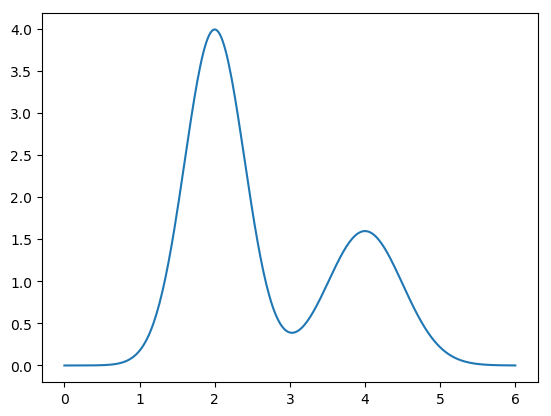

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1272cf518>

In [1]:
using PyCall
include("src/gauss_error.jl")
include("src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
function kernel(x::Float64, y::Float64)
    return getOpticsKernels("triangular")(x, y)
end

kernel (generic function with 1 method)

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]

#59 (generic function with 1 method)

In [4]:
y = collect(range(a, stop=b, length=50))

50-element Array{Float64,1}:
 0.0                
 0.12244897959183673
 0.24489795918367346
 0.3673469387755102 
 0.4897959183673469 
 0.6122448979591837 
 0.7346938775510204 
 0.8571428571428571 
 0.9795918367346939 
 1.1020408163265305 
 1.2244897959183674 
 1.346938775510204  
 1.469387755102041  
 ⋮                  
 4.653061224489796  
 4.775510204081633  
 4.8979591836734695 
 5.020408163265306  
 5.142857142857143  
 5.26530612244898   
 5.387755102040816  
 5.510204081632653  
 5.63265306122449   
 5.755102040816326  
 5.877551020408164  
 6.0                

In [ ]:
ftrue = convolution.(y)
sig = 0.05*ftrue + [0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

In [ ]:
basis = FourierBasis(a, b, 25)

In [ ]:
model = GaussErrorUnfolder(basis, omega(basis, 2))

In [ ]:
phi_reconstruct = solve(model, kernel, f, sig, y)

In [ ]:
phivec = PhiVec(phi_reconstruct["coeff"], basis, phi_reconstruct["sig"])

In [ ]:
plot(x, phi.(x))

phi_reconstructed = call(phivec, x)
phi_reconstructed_errors = errors(phivec, x)

plot(x, call(phivec, x))
fill_between(x, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3);